In [1]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


               Mean    Median     stdev   minimum  maximum.  Skewness  \
BITCOINRT  0.000586  0.001330  0.041308 -0.455587  0.221475 -0.770582   
ETHERRT    0.000750  0.001640  0.052132 -0.547019  0.232314 -0.947240   
BNBRT     -0.000092 -0.000341  0.056806 -0.455244  0.394949 -0.132594   
USDTRT     0.000243 -0.000690  0.065301 -0.547453  0.604866  0.786336   

            Kurtosis   Jarque-Bera  Probability  Observations  
BITCOINRT  11.044546   8777.544946          0.0        1694.0  
ETHERRT     9.570694   6718.632738          0.0        1694.0  
BNBRT       8.577029   5197.456751          0.0        1694.0  
USDTRT     15.573752  17293.979586          0.0        1694.0  


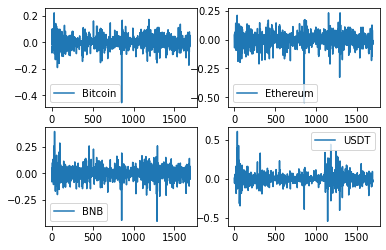

In [30]:
import csv
import statistics
import numpy as np
from math import log
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera

def daily_log_returns(prices):
  """Calculate the daily log returns for a list of prices."""
  returns = []
  for i in range(1, len(prices)):
    log_return = log(prices[i] / prices[i-1])
    returns.append(log_return)
  return returns

def load_data(filename):
  """Load price data from a CSV file and return a list of prices."""
  with open(filename, "r") as csv_file:
    reader = csv.reader(csv_file)
    # Skip the header row
    next(reader)
    # Extract the prices from the CSV file, handling missing or invalid data
    prices = []
    for row in reader:
      try:
        price = float(row[1])
      except ValueError:
        # The value couldn't be converted to a float, so skip it
        continue
      prices.append(price)
  return prices


def calc_stats(returns):
  """Calculate and return descriptive statistics for a list of returns."""
  mean = statistics.mean(returns)
  median = statistics.median(returns)
  stdev = statistics.stdev(returns)
  minimum = min(returns)
  maximum = max(returns)
  skewness = skew(returns)
  kurt = kurtosis(returns)
  jb_stat, jb_pvalue = jarque_bera(returns)
  observations = len(returns)
  return mean, median, stdev, minimum, maximum, skewness, kurt, jb_stat, jb_pvalue, observations

# Load the price data for each cryptocurrency
btc_prices = load_data("BTC-USD.csv")
eth_prices = load_data("ETH-USD.csv")
bnb_prices = load_data("BNB-USD.csv")
usdt_prices = load_data("USDT-USD.csv")

btc_prices = np.array(load_data("BTC-USD.csv"), dtype=np.float64)
eth_prices = np.array(load_data("ETH-USD.csv"), dtype=np.float64)
bnb_prices = np.array(load_data("BNB-USD.csv"), dtype=np.float64)
usdt_prices = np.array(load_data("USDT-USD.csv"), dtype=np.float64)


# Calculate the daily log returns for each cryptocurrency
btc_returns = daily_log_returns(btc_prices)
eth_returns = daily_log_returns(eth_prices)
bnb_returns = daily_log_returns(bnb_prices)
usdt_returns = daily_log_returns(usdt_prices)

# Calculate descriptive statistics for each cryptocurrency
btc_stats = calc_stats(btc_returns)
eth_stats = calc_stats(eth_returns)
bnb_stats = calc_stats(bnb_returns)
usdt_stats = calc_stats(usdt_returns)

crypto_stats = {'BITCOINRT': btc_stats, 'ETHERRT': eth_stats, 'BNBRT': ltc_stats, 'USDTRT': xrp_stats}
df = pd.DataFrame(crypto_stats)
df = df.transpose()
df.rename(columns={0: 'Mean', 1: 'Median', 2: 'stdev', 3: 'minimum', 4: 'maximum.', 5: 'Skewness', 6: 'Kurtosis', 7: 'Jarque-Bera', 8: 'Probability', 9: 'Observations'}, inplace=True)
print(df)
# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2)

# Plot the daily log returns for each cryptocurrency
axs[0][0].plot(btc_returns, label="Bitcoin")
axs[0][1].plot(eth_returns, label="Ethereum")
axs[1][0].plot(ltc_returns, label="BNB")
axs[1][1].plot(xrp_returns, label="USDT")

# Add a legend to each subplot
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()

# Show the plot
plt.show()


In [16]:
returns = {'BITCOINRT': btc_returns, 'ETHERRT': eth_returns, 'BNBRT': ltc_returns, 'USDTRT': xrp_returns}
df_returns = pd.DataFrame(returns)
correlation_matrix = df_returns.corr()
print(correlation_matrix)

           BITCOINRT   ETHERRT     BNBRT    USDTRT
BITCOINRT   1.000000  0.784934  0.761162  0.551680
ETHERRT     0.784934  1.000000  0.824683  0.645465
BNBRT       0.761162  0.824683  1.000000  0.635907
USDTRT      0.551680  0.645465  0.635907  1.000000


In [17]:
from statsmodels.tsa.stattools import adfuller
for col in df_returns.columns:
    result = adfuller(df_returns[col])
    print(f"Currency : {col}, ADF Statistic: {result[0]:.4f}, p-value : {result[1]:.4f}")


Currency : BITCOINRT, ADF Statistic: -28.3278, p-value : 0.0000
Currency : ETHERRT, ADF Statistic: -12.2028, p-value : 0.0000
Currency : BNBRT, ADF Statistic: -15.3287, p-value : 0.0000
Currency : USDTRT, ADF Statistic: -8.7473, p-value : 0.0000


In [18]:
from sklearn.preprocessing import scale
df_returns_scaled = pd.DataFrame(scale(df_returns), columns=df_returns.columns)


In [20]:
import statsmodels.api as sm


In [21]:
# Transform returns into time series format
ts_returns = pd.DataFrame(btc_returns)
ts_returns.index = pd.date_range(start='1/1/2010', periods=len(btc_returns), freq='D')
ts_returns = ts_returns.iloc[:,0].to_frame(name='returns')


In [22]:
# Fit the ARIMA(1,1) model
model = sm.tsa.ARIMA(ts_returns, order=(1,1,0))
arima_fit = model.fit()


C:\Users\FultonRose\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [23]:
print(arima_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:              D.returns   No. Observations:                 1693
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2668.410
Method:                       css-mle   S.D. of innovations              0.050
Date:                Wed, 11 Jan 2023   AIC                          -5330.819
Time:                        22:54:26   BIC                          -5314.516
Sample:                    01-02-2010   HQIC                         -5324.783
                         - 08-21-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.318e-05      0.001      0.029      0.977      -0.002       0.002
ar.L1.D.returns    -0.5388      0.020    -26.332      0.000      -0.579      -0.499
                                

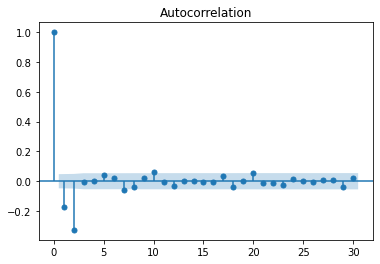

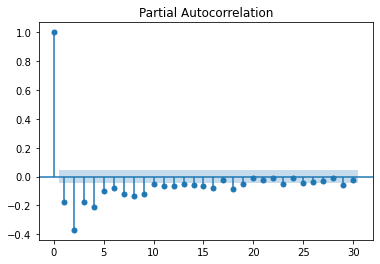

In [24]:
# Plot diagnostic information
sm.graphics.tsa.plot_acf(arima_fit.resid, lags=30)
sm.graphics.tsa.plot_pacf(arima_fit.resid, lags=30)
plt.show()


C:\Users\FultonRose\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Bitcoin
                             ARIMA Model Results                              
Dep. Variable:              D.returns   No. Observations:                 1693
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2668.410
Method:                       css-mle   S.D. of innovations              0.050
Date:                Wed, 11 Jan 2023   AIC                          -5330.819
Time:                        22:55:06   BIC                          -5314.516
Sample:                    01-02-2010   HQIC                         -5324.783
                         - 08-21-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.318e-05      0.001      0.029      0.977      -0.002       0.002
ar.L1.D.returns    -0.5388      0.020    -26.332      0.000      -0.579      -0.499
                        

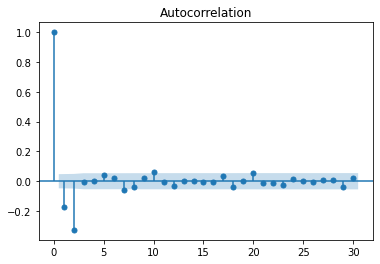

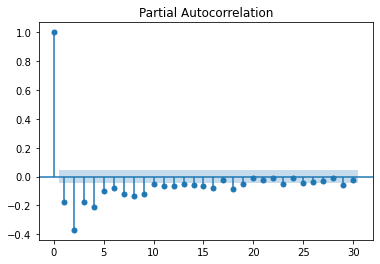

C:\Users\FultonRose\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Ethereum
                             ARIMA Model Results                              
Dep. Variable:              D.returns   No. Observations:                 1693
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2286.794
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 11 Jan 2023   AIC                          -4567.588
Time:                        22:55:07   BIC                          -4551.285
Sample:                    01-02-2010   HQIC                         -4561.551
                         - 08-21-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.348e-05      0.001     -0.024      0.981      -0.002       0.002
ar.L1.D.returns    -0.5584      0.020    -27.697      0.000      -0.598      -0.519
                       

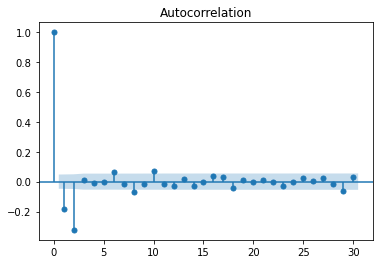

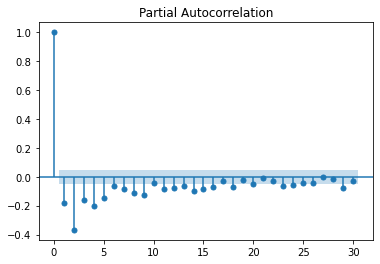

C:\Users\FultonRose\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


BNB
                             ARIMA Model Results                              
Dep. Variable:              D.returns   No. Observations:                 1693
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2027.158
Method:                       css-mle   S.D. of innovations              0.073
Date:                Wed, 11 Jan 2023   AIC                          -4048.316
Time:                        22:55:07   BIC                          -4032.013
Sample:                    01-02-2010   HQIC                         -4042.279
                         - 08-21-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.398e-05      0.001      0.012      0.990      -0.002       0.002
ar.L1.D.returns    -0.5447      0.020    -26.730      0.000      -0.585      -0.505
                            

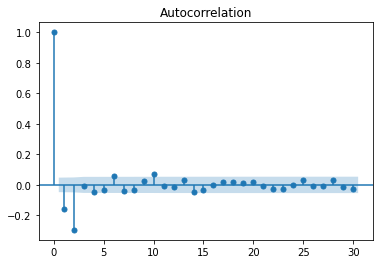

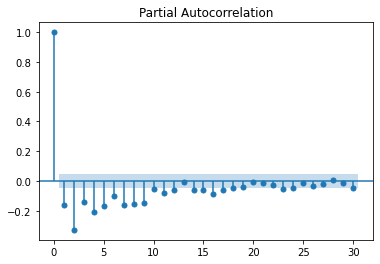

C:\Users\FultonRose\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Usdt
                             ARIMA Model Results                              
Dep. Variable:              D.returns   No. Observations:                 1693
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6194.612
Method:                       css-mle   S.D. of innovations              0.006
Date:                Wed, 11 Jan 2023   AIC                         -12383.225
Time:                        22:55:08   BIC                         -12366.922
Sample:                    01-02-2010   HQIC                        -12377.188
                         - 08-21-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.663e-06   9.44e-05      0.018      0.986      -0.000       0.000
ar.L1.D.returns    -0.6050      0.019    -31.295      0.000      -0.643      -0.567
                           

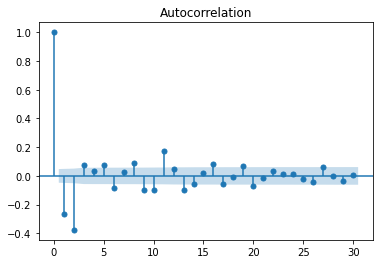

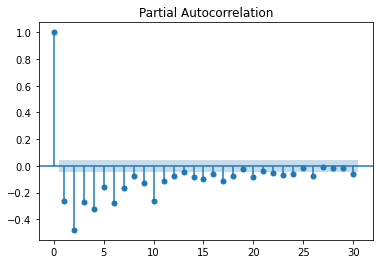

In [26]:
# Fit the ARIMA(1,1) model to each cryptocurrency
currencies = {'Bitcoin': btc_returns, 'Ethereum': eth_returns, 'BNB': bnb_returns, 'Usdt': usdt_returns}
for currency, returns in currencies.items():
    # Transform returns into time series format
    ts_returns = pd.DataFrame(returns)
    ts_returns.index = pd.date_range(start='1/1/2010', periods=len(returns), freq='D')
    ts_returns = ts_returns.iloc[:,0].to_frame(name='returns')

    # Fit the ARIMA(1,1) model
    model = sm.tsa.ARIMA(ts_returns, order=(1,1,0))
    arima_fit = model.fit()

    # Print summary and diagnostic information
    print(currency)
    print(arima_fit.summary())
    sm.graphics.tsa.plot_acf(arima_fit.resid, lags=30)
    sm.graphics.tsa.plot_pacf(arima_fit.resid, lags=30)
    plt.show()


In [27]:
import arch

# Fit the GARCH(1,1) model to each cryptocurrency
currencies = {'Bitcoin': btc_returns, 'Ethereum': eth_returns, 'BNB': bnb_returns, 'Usdt': usdt_returns}
for currency, returns in currencies.items():
    # Create a GARCH model
    garch_model = arch.arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)

    # Fit the GARCH model
    garch_fit = garch_model.fit(disp='off')

    # Print summary of the fit
    print(currency)
    print(garch_fit.summary())


Bitcoin
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3077.19
Distribution:                  Normal   AIC:                          -6148.39
Method:            Maximum Likelihood   BIC:                          -6132.08
                                        No. Observations:                 1694
Date:                Wed, Jan 11 2023   Df Residuals:                     1694
Time:                        22:55:24   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.8831e-05  3.379e-05      2.629  8.556

C:\Users\FultonRose\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001705. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\FultonRose\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002716. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\FultonRose\anaconda3\lib\site-packages\arch\univariate\base.p

In [28]:
import arch

# Fit the EGARCH(1,1) model to each cryptocurrency
currencies = {'Bitcoin': btc_returns, 'Ethereum': eth_returns, 'BNB': bnb_returns, 'Usdt': usdt_returns}
for currency, returns in currencies.items():
    # Create a EGARCH model
    egarch_model = arch.arch_model(returns, mean='Zero', vol='EGARCH', p=1, q=1)

    # Fit the EGARCH model
    egarch_fit = egarch_model.fit(disp='off')

    # Print summary of the fit
    print(currency)
    print(egarch_fit.summary())


C:\Users\FultonRose\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001705. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\FultonRose\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002716. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\FultonRose\anaconda3\lib\site-packages\arch\univariate\base.p

Bitcoin
                       Zero Mean - EGARCH Model Results                       
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                     EGARCH   Log-Likelihood:                3072.50
Distribution:                  Normal   AIC:                          -6138.99
Method:            Maximum Likelihood   BIC:                          -6122.69
                                        No. Observations:                 1694
Date:                Wed, Jan 11 2023   Df Residuals:                     1694
Time:                        22:55:44   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         -0.3990      0.146     -2.729  6.348e-03  